# **LangGraph Glossary 03:**

1. START Node & END Node.
2. Edges:
    1. Normal Edges,
    2. Conditional Edges,
    3. Entry Point,
    4. Conditional Entry Point

## **1. START & END Nodes:**

**START Node:** 
* The **START Node** is a special node that represents the beginning of the workflow.
* It is automatically added to the graph and does not require explicit definition.
* When the workflow starts, execution begins at the **START Node**.

<br>

**END Node:**
* The **END Node** is a special node that represents the termination of the workflow.
* It is automatically added to the graph and does not require explicit definition.
* When the workflow reaches the **END Node**, execution stops.

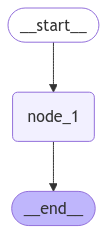

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import Dict, Any

# Define the state
State = Dict[str, Any]

# Create a StateGraph
state_graph = StateGraph(State)

# Define a node
def node_1(state: State) -> State:
    state["message"] = "Hello from Node 1"
    return state

# Add the node to the graph
state_graph.add_node("node_1", node_1)

# Define edges: START -> node_1 -> END
state_graph.add_edge(START, "node_1")
state_graph.add_edge("node_1", END)

# Set the entry point
state_graph.set_entry_point("node_1")

# Compile the graph
app = state_graph.compile()
app

In [3]:
# Run the graph

initial_state = {}
final_state = app.invoke(initial_state)

print(final_state)  # Output: {'message': 'Hello from Node 1'}

{'message': 'Hello from Node 1'}


## **2. Edges: Normal Edges, Conditional Edges, Entry Point, Conditional Entry Point**

### **2.1 Normal Edges:**

* **Normal Edges** define a fixed flow of control between nodes.
* They are **unconditional**, meaning the workflow always follows the edge from one node to the next.

In [4]:
from langgraph.graph import StateGraph
from typing import Dict, Any

# Define the state
State = Dict[str, Any]

# Create a StateGraph
state_graph = StateGraph(State)

# Define nodes
def node_1(state: State) -> State:
    state["message"] = "Hello from Node 1"
    return state

def node_2(state: State) -> State:
    state["message"] += " -> Hello from Node 2"
    return state

# Add nodes to the graph
state_graph.add_node("node_1", node_1)
state_graph.add_node("node_2", node_2)

# Define normal edges: node_1 -> node_2
state_graph.add_edge("node_1", "node_2")

# Set the entry point
state_graph.set_entry_point("node_1")

# Compile the graph
app = state_graph.compile()

# Run the graph
initial_state = {}
final_state = app.invoke(initial_state)

print(final_state)  # Output: {'message': 'Hello from Node 1 -> Hello from Node 2'}

{'message': 'Hello from Node 1 -> Hello from Node 2'}


### **2.2 Conditional Edges:**

* **Conditional Edges** allow the workflow to branch based on the current state or the output of a node.
* A condition function determines which node to execute next.

#### **Example 01:**

In [43]:
from langgraph.graph import StateGraph
from typing import Dict, Any


# Define the state
State = Dict[str, Any]


# Define nodes
def conditional_node(state: State) -> State:
    state["value"] = state.get("value", 0)  # Initialize value if not present
    return state

def node_2(state: State) -> State:
    state["value"] += 5
    return state

def node_3(state: State) -> State:
    state["value"] *= 2
    return state

In [44]:
# Create a StateGraph
state_graph = StateGraph(State)


# Add nodes to the graph
state_graph.add_node("conditional_node", conditional_node) # Entry Point
state_graph.add_node("node_2", node_2)
state_graph.add_node("node_3", node_3)


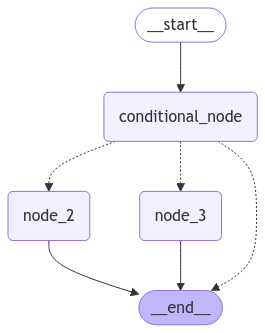

In [45]:
# Define conditional edges
def router(state: State) -> str:
    if state["value"] >= 10:
        return "node_2"
    else:
        return "node_3"
    

state_graph.add_conditional_edges(
    "conditional_node", # where in graph to start
    router # function to determine which node is called
)

state_graph.add_edge("node_2", END)
state_graph.add_edge("node_3", END)


# Entry Point:
state_graph.set_entry_point("conditional_node")



app = state_graph.compile()
app

In [46]:
# Run the graph
initial_state = {}
final_state = app.invoke(initial_state)
final_state

{'value': 0}

In [47]:
initial_state = {"value": 2}
final_state = app.invoke(initial_state)
final_state

{'value': 4}

In [48]:
initial_state = {"value": 10}
final_state = app.invoke(initial_state)
final_state

{'value': 15}

In [50]:
initial_state = {"value": 15}
final_state = app.invoke(initial_state)
final_state

{'value': 20}

### **2.3 Entry Point:**

* The **Entry Point** is the node where the workflow begins execution.
* It is set using the **`set_entry_point`** method.

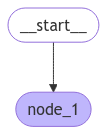

In [53]:
# Example:

from langgraph.graph import StateGraph
from typing import Dict, Any

# Define the state
State = Dict[str, Any]

# Create a StateGraph
state_graph = StateGraph(State)

# Define a node
def node_1(state: State) -> State:
    state["message"] = "Hello from Node 1"
    return state

# Add the node to the graph
state_graph.add_node("node_1", node_1)

# Set the entry point
state_graph.set_entry_point("node_1")

# Compile the graph
app = state_graph.compile()
app

In [54]:
# Run the graph
initial_state = {}
final_state = app.invoke(initial_state)

print(final_state)  # Output: {'message': 'Hello from Node 1'}

{'message': 'Hello from Node 1'}


### **2.4 Conditional Entry Point:**

* A **Conditional Entry Point** allows the workflow to start at different nodes based on the initial state.
* It is implemented using a condition function that determines the starting node.

#### **Example 01:**

In [68]:
from langgraph.graph import StateGraph, START, END
from typing import Dict, Any

# Define the state
State = Dict[str, Any]


# Define nodes
def node_1(state: State) -> State:
    state["message"] = "Hello from Node 1"
    return state

def node_2(state: State) -> State:
    state["message"] = "Hello from Node 2"
    return state

In [69]:
# Create a StateGraph
state_graph = StateGraph(State)

# Add nodes to the graph
state_graph.add_node("node_1", node_1)
state_graph.add_node("node_2", node_2)

# Define edges:
state_graph.add_edge("node_1", END)
state_graph.add_edge("node_2", END)

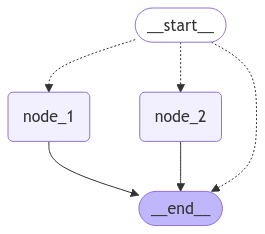

In [70]:
# Define conditional entry point
def router(state: State) -> str:
    if state.get("start_at_node_2", False):
        return "node_2"
    else:
        return "node_1"

state_graph.set_conditional_entry_point(router)

# Compile the graph
app = state_graph.compile()
app

In [71]:
# Run the graph with different initial states
initial_state_1 = {}
final_state_1 = app.invoke(initial_state_1)
print(final_state_1) # # Output: {'message': 'Hello from Node 1'}

{'message': 'Hello from Node 1'}


In [72]:
initial_state_2 = {"start_at_node_2": True}
final_state_2 = app.invoke(initial_state_2)
print(final_state_2)  # Output: {'message': 'Hello from Node 2'}

{'start_at_node_2': True, 'message': 'Hello from Node 2'}
